In [1]:
#Multivariate adaptive regression splines, implemented by the Earth class, is a flexible regression method that automatically searches for interactions and non-linear relationships. Earth models can be thought of as linear models in a higher dimensional basis space

In [2]:
#. Each term in an Earth model is a product of so called “hinge functions”. A hinge function is a function that’s equal to its argument where that argument is greater than zero and is zero everywhere else.

#h(x−t)=[x−t]+={x−t,0,x>tx≤t


In [3]:
#An Earth model is a linear combination of basis functions, each of which is a product of one or more of the following:

#A constant
#Linear functions of input variables
#Hinge functions of input variables


In [4]:
#For example, a simple piecewise linear function in one variable can be expressed as a linear combination of two hinge functions and a constant (see below). During fitting, the Earth class automatically determines which variables and basis functions to use. The algorithm has two stages. First, the forward pass searches for terms that locally minimize squared error loss on the training set. Next, a pruning pass selects a subset of those terms that produces a locally minimal generalized cross-validation (GCV) score. The GCV score is not actually based on cross-validation, but rather is meant to approximate a true cross-validation score by penalizing model complexity. The final result is a set of basis functions that is nonlinear in the original feature space, may include interactions, and is likely to generalize well.

#y=1−2h(1−x)+12h(x−1)

In [8]:
import numpy
from matplotlib import pyplot


In [65]:
from pyearth import Earth# had to 
#aa@abdullahs-mbp ~/Documents
#$ pip install pyearth
#Collecting pyearth
# Could not find a version that satisfies the requirement pyearth (from versions: )
#No matching distribution found for pyearth

#conda install -c conda-forge sklearn-contrib-py-earth

#didnt need to conda install -c mehdidc pyearth , but just in case 


In [15]:
#Create some fake data
numpy.random.seed(0)
m = 1000
n = 10


X = 80*numpy.random.uniform(size=(m,n)) - 40 #


y = numpy.abs(X[:,6] - 4.0) + 1*numpy.random.normal(size`=m) # a function of x 


In [16]:
X

array([[  3.90508031,  17.21514931,   8.22107009, ...,  31.34184006,
         37.09302084,  -9.32467849],
       [ 23.33800305,   2.31159358,   5.44356489, ...,  26.60958764,
         22.25254008,  29.60097186],
       [ 38.28946738,  23.93268514,  -3.08165102, ...,  35.57351336,
          1.74786574,  -6.8270448 ],
       ...,
       [ -7.25467333,  25.29768818, -39.07606075, ...,  -9.86056838,
         15.81668644,  27.87363137],
       [ -1.73467407,  27.70880311,   3.86554703, ...,  21.22734517,
          2.04021759,  39.28345621],
       [ 15.5986663 , -24.4314486 , -30.87705929, ...,  20.67436166,
        -38.0970058 ,  25.0860064 ]])

In [21]:
X.size#size


10000

In [22]:
X.ndim#number of dimensions 


2

In [24]:
X.shape# A x B


(1000, 10)

In [45]:
w=numpy.abs(X[:,6] - 4.0) 

In [46]:
w.size

1000

In [76]:
#X[:,6][:]




In [77]:
print (X[:,6].shape )# a vector comprimised of a row
X[:,6:7].shape #lol its a vector of colums 

(1000,)


(1000, 1)

In [55]:
X[:,6].ndim

1

In [68]:
w.shape

(1000,)

In [78]:
#w

In [79]:
y.shape


(1000,)

In [83]:
#Fit an Earth model
model = Earth()


In [89]:
model.fit(X,y)#made the infit 

/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [90]:
print(model.trace())

Forward Pass
-------------------------------------------------------------------
iter  parent  var  knot  mse         terms  gcv      rsq    grsq   
-------------------------------------------------------------------
0     -       -    -     150.123858  1      150.425  0.000  0.000  
1     0       6    595   0.923957    3      0.935    0.994  0.994  
2     0       6    813   0.911088    5      0.931    0.994  0.994  
-------------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
------------------------------------------------
iter  bf  terms  mse     gcv      rsq    grsq   
------------------------------------------------
0     -   5      0.91    0.931    0.994  0.994  
1     2   4      0.91    0.927    0.994  0.994  
2     3   3      0.91    0.923    0.994  0.994  
3     1   2      84.42   85.014   0.438  0.435  
4     4   1      150.12  150.425  0.000  0.000  
------------------------------------------------
Select

In [86]:
print(model.summary())



Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      0.234314     
h(x6-4.33545)   No      0.998419     
h(4.33545-x6)   Yes     None         
h(x6-3.82025)   Yes     None         
h(3.82025-x6)   No      0.997038     
-------------------------------------
MSE: 0.9115, GCV: 0.9225, RSQ: 0.9939, GRSQ: 0.9939


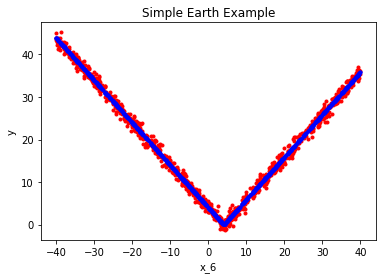

In [87]:
#Plot the model
y_hat = model.predict(X)#predict y for given x from the model 
pyplot.figure()
pyplot.plot(X[:,6],y,'r.')
pyplot.plot(X[:,6],y_hat,'b.')
pyplot.xlabel('x_6')
pyplot.ylabel('y')
pyplot.title('Simple Earth Example')
pyplot.show()

In [91]:
#The MARS algorithm does learning in two steps. First we overgenerate a set of basis functions in the so called “forward pass”. The forward pass searches for terms that locally minimize squared error loss on the training set. Here we just add basis functions in a greedy way one after another. In The second step, the “pruning pass”, we remove unnecessary basis functions. The pruning pass uses generalized cross validation (GCV) to compare the performance of model subsets in order to choose the best subset: lower values of GCV are better. The GCV is a form of regularization: it trades off goodness-of-fit against model complexity.

#The formula for the GCV is

  #  \[ GCV = \frac{RSS}{(N (1 - EffectiveNumberOfParameters / N)^2)} \]

In [92]:
#https://www.depends-on-the-definition.com/multivariate-adaptive-regression-splines/

In [93]:
#The EffectiveNumberOfParameters is defined in the MARS context as

   # \[ EffectiveNumberOfParameters = n\_terms  +  penalty  \frac{(n\_terms - 1 )}{2}.\]